In [ ]:
import pickle

import cv2
import matplotlib.pyplot as plt
import pygame
import torch
from pygame.surfarray import array3d

from game.Constants import h, w
from game.MainGame import MainGame

In [2]:
replay = pickle.load(open("outputs/replay_memory.pth", "rb"))

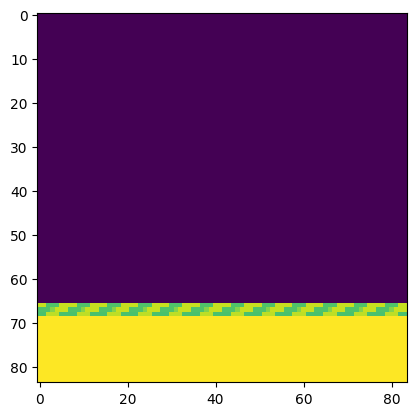

In [114]:
from random import randint

state, action, reward, next_state, done = replay[randint(0, len(adu) - 1)]
plt.imshow(next_state[0][[4], :, :].permute(1, 2, 0))

In [67]:
from model.DeepQNetwork import DeepQNetwork


m = DeepQNetwork()
optimizer = torch.optim.Adam(m.parameters(), lr=1e-4)

In [68]:
X = adu[0][0]

In [69]:
y = torch.tensor([0])

In [70]:
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
for i in range(100):
    y_hat = m(X)
    loss = loss_fn(y_hat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item())

In [2]:
pygame.init()

screen = pygame.display.set_mode((w, h))

In [3]:
main_game = MainGame(screen)

1 False


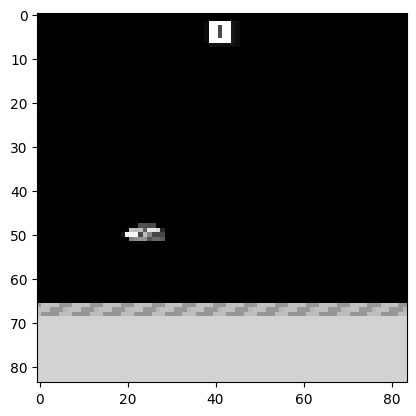

In [272]:
state, reward, done = main_game.update(0)
plt.imshow(state.permute(1, 2, 0), cmap="gray")
print(reward, done)

In [ ]:
plt.imshow(array3d(pygame.display.get_surface()))

In [358]:
img = array3d(pygame.display.get_surface())
im = cv2.cvtColor(cv2.resize(img, (84, 84)), cv2.COLOR_RGB2GRAY)
_, im2 = cv2.threshold(im, 1, 255, cv2.THRESH_BINARY)

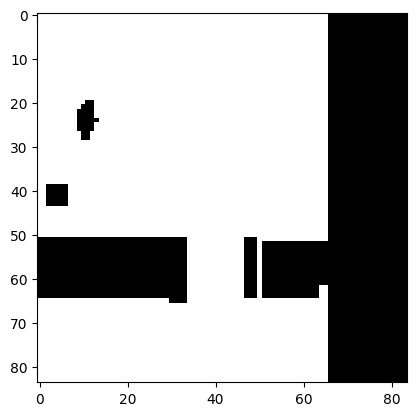

In [359]:
plt.imshow(
    cv2.adaptiveThreshold(
        im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 201, 5
    ),
    cmap="gray",
)